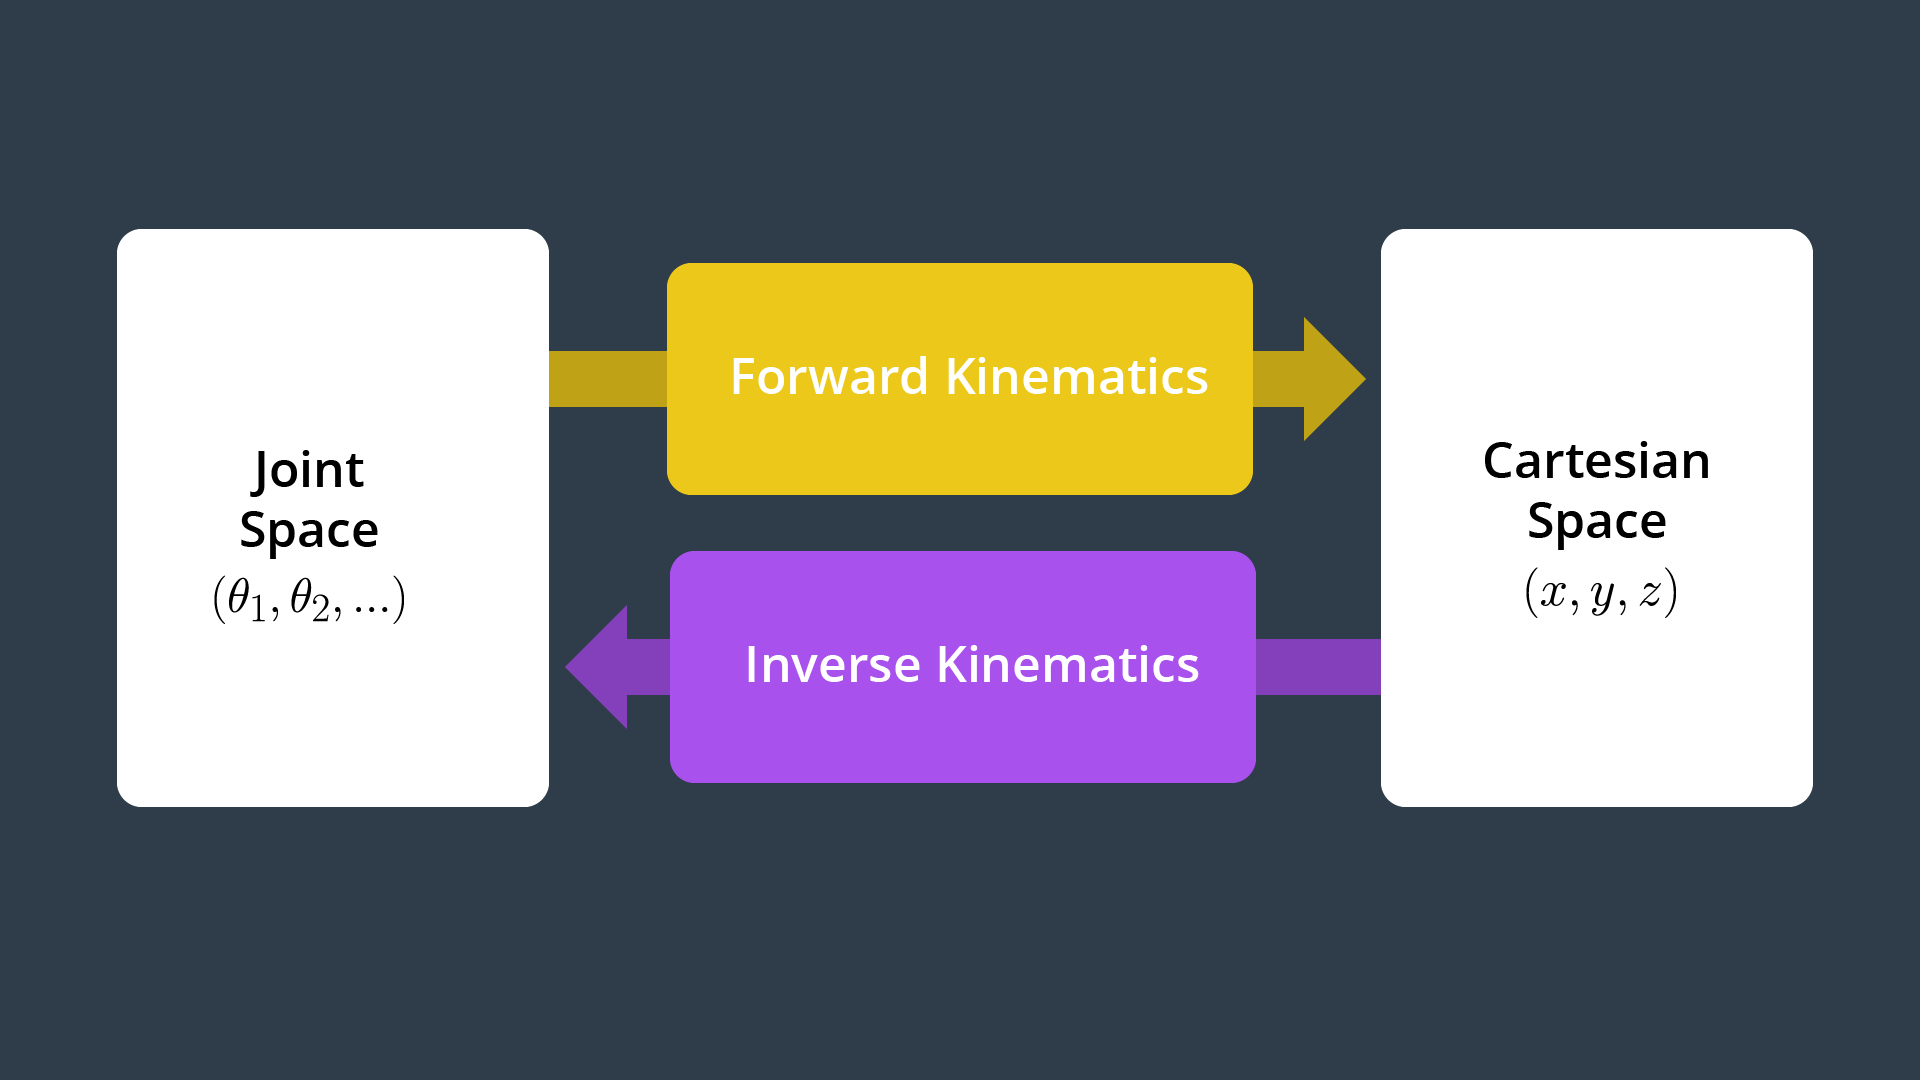

Recall that, in the FK problem, we know all the joint variables, that is the generalized coordinates associated with the revolute and prismatic joints, and we wish to calculate the pose of the end effector in a 3D world. In the next lesson we consider the more challenging inverse kinematics problem. In the IK problem the position and orientation of the end effector is known and the objective is to solve for the joint variables.

The FK problem boils down to the composition of homogeneous transforms. We start with the base link and move link by link to the end effector. And we use the DH parameters to build each individual transform.

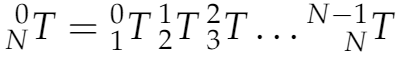

Recall that the total transform between adjecent links,

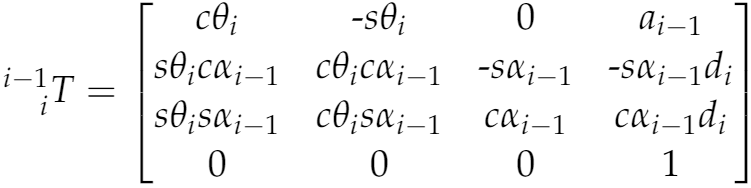

for each link is actually composed of four individual transforms, 2 rotations and 2 translations, performed in the order shown here

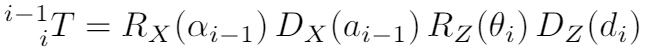



The robot we will use as an example is one we have seen before, the SCARA. You can find the DH parameter table for it in the text.

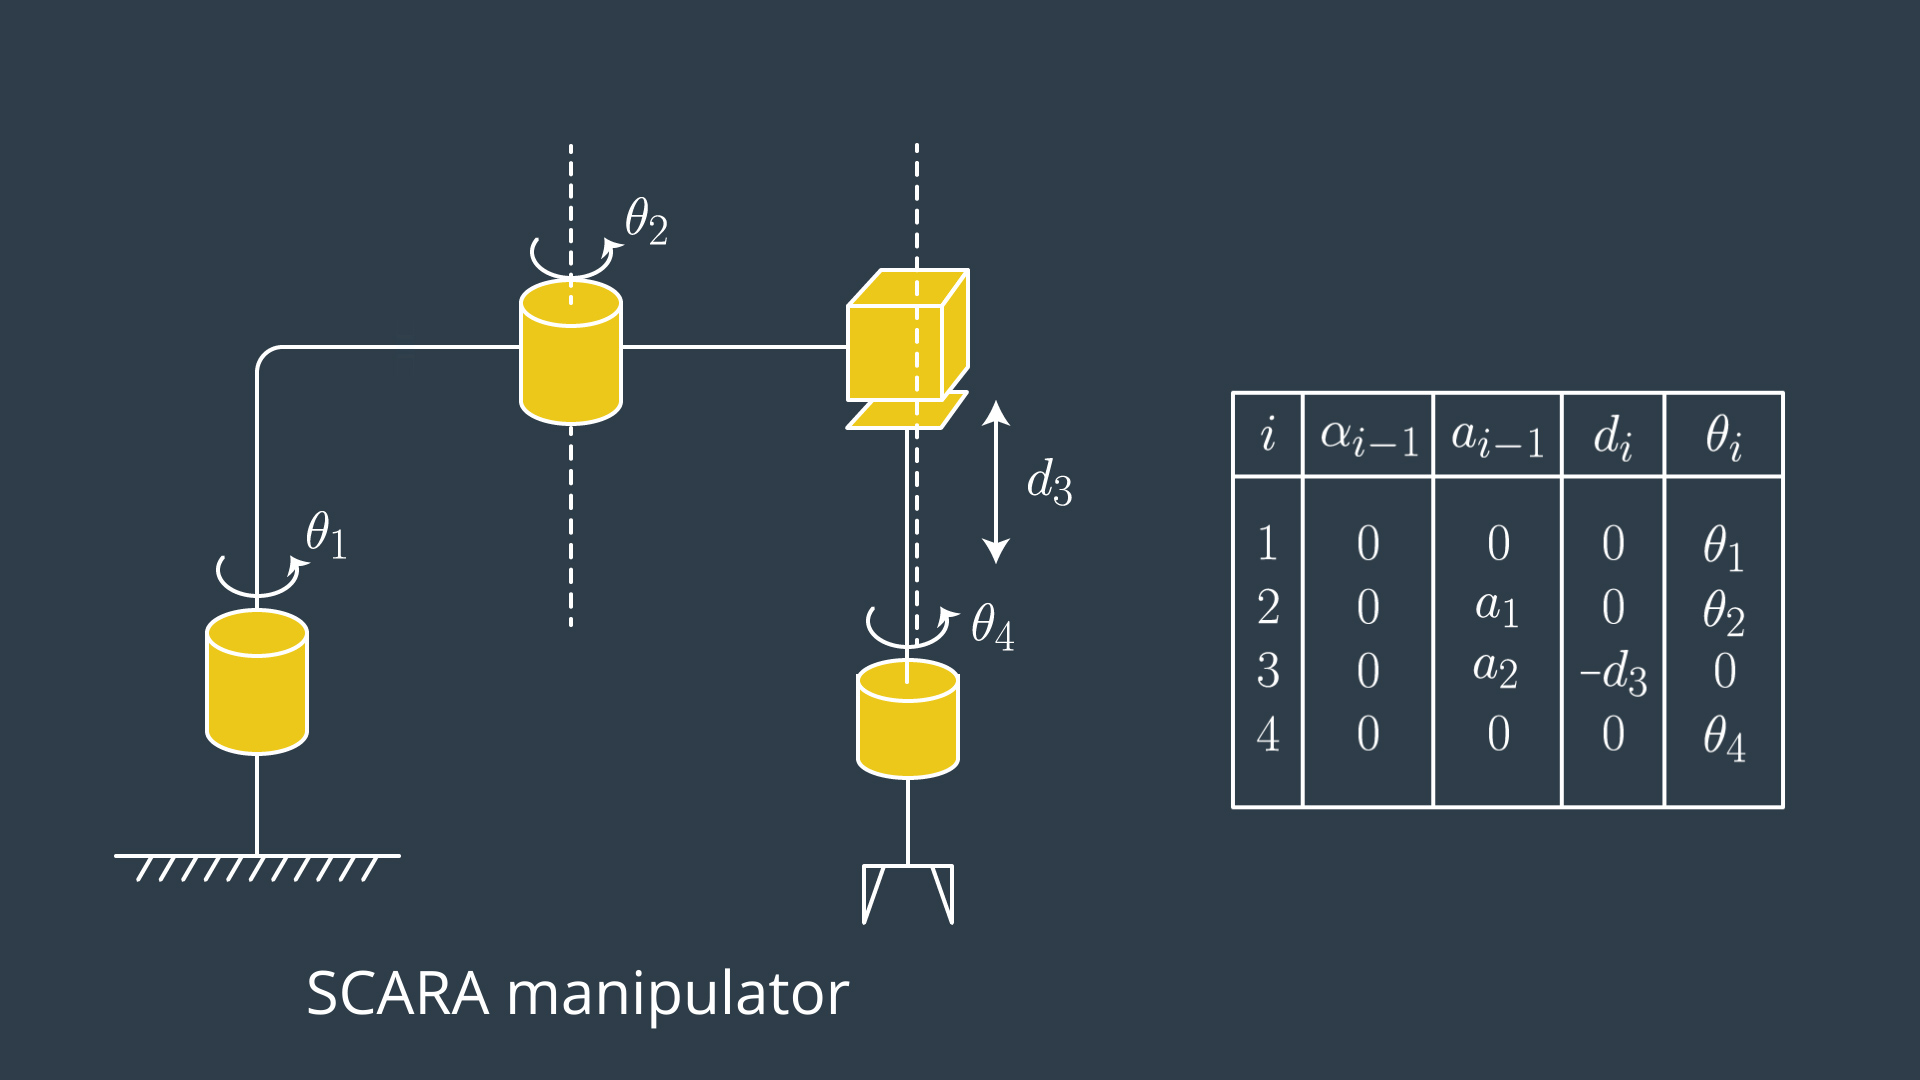

In [4]:
from sympy import symbols, cos, sin, pi, simplify
from sympy.matrices import Matrix
import numpy as np

In [5]:
from sympy import init_printing
init_printing()

In [6]:
# Conversion Factors
rtd = 180./np.pi # radians to degrees
dtr = np.pi/180. # degrees to radians

Next, we define symbols that we will use in the transform equations. Here I have used q’s to denote generalized coordinates; the d’s, a’s, and, alpha’s are the other DH parameters.

In [7]:
### Create symbols for joint variables
q1, q2, q3, q4 = symbols('q1:5')
d1, d2, d3, d4 = symbols('d1:5')
a0, a1, a2, a3 = symbols('a0:4')
alpha0, alpha1, alpha2, alpha3 = symbols('alpha0:4')

In [8]:
# For the non-zero constant DH-parameters, I choose numerical values.

a12 = 0.4500 # meters
a23 = 0.3000 # meters

In [9]:
# Here I set up a dictionary that binds numerical values to those DH parameters that are constants.

# DH Parameters
s = {alpha0: 0,  a0:   0, d1: 0, 
     alpha1: 0,  a1: a12, d2: 0,  
     alpha2: 0,  a2: a23,        q3: 0,
     alpha3: 0,  a3:   0, d4: 0}



In [10]:
# I then define the homogeneous transform between adjacent links and, with the subs method, substitute our known constant values into the expression.

#### Homogeneous Transforms
T0_1 = Matrix([[             cos(q1),            -sin(q1),            0,              a0],
               [ sin(q1)*cos(alpha0), cos(q1)*cos(alpha0), -sin(alpha0), -sin(alpha0)*d1],
               [ sin(q1)*sin(alpha0), cos(q1)*sin(alpha0),  cos(alpha0),  cos(alpha0)*d1],
               [                   0,                   0,            0,               1]])
T0_1 = T0_1.subs(s)

T1_2 = Matrix([[             cos(q2),            -sin(q2),            0,              a1],
               [ sin(q2)*cos(alpha1), cos(q2)*cos(alpha1), -sin(alpha1), -sin(alpha1)*d2],
               [ sin(q2)*sin(alpha1), cos(q2)*sin(alpha1),  cos(alpha1),  cos(alpha1)*d2],
               [                   0,                   0,            0,               1]])
T1_2 = T1_2.subs(s)

T2_3 = Matrix([[             cos(q3),            -sin(q3),            0,              a2],
               [ sin(q3)*cos(alpha2), cos(q3)*cos(alpha2), -sin(alpha2), -sin(alpha2)*d3],
               [ sin(q3)*sin(alpha2), cos(q3)*sin(alpha2),  cos(alpha2),  cos(alpha2)*d3],
               [                   0,                   0,            0,               1]])
T2_3 = T2_3.subs(s)

T3_4 = Matrix([[             cos(q4),            -sin(q4),            0,              a3],
               [ sin(q4)*cos(alpha3), cos(q4)*cos(alpha3), -sin(alpha3), -sin(alpha3)*d4],
               [ sin(q4)*sin(alpha3), cos(q4)*sin(alpha3),  cos(alpha3),  cos(alpha3)*d4],
               [                   0,                   0,            0,               1]])
T3_4 = T3_4.subs(s)

In [11]:
# Finally, I create the overall transform between the base frame and end effector by composing the individual link transforms.

# Transform from base link to end effector
T0_4 = simplify(T0_1 * T1_2 * T2_3 * T3_4)

As the name suggests, simplify attempts to simplify the expression by making use of trigonometric identities and canceling or factoring common terms whenever possible.

The print command displays the overall transform.

In [12]:
T0_4


⎡cos(q₁ + q₂ + q₄)  -sin(q₁ + q₂ + q₄)  0  0.45⋅cos(q₁) + 0.3⋅cos(q₁ + q₂)⎤
⎢                                                                         ⎥
⎢sin(q₁ + q₂ + q₄)  cos(q₁ + q₂ + q₄)   0  0.45⋅sin(q₁) + 0.3⋅sin(q₁ + q₂)⎥
⎢                                                                         ⎥
⎢        0                  0           1                d₃               ⎥
⎢                                                                         ⎥
⎣        0                  0           0                 1               ⎦

In [15]:
# There are many ways to numerically evaluate a symbolic expression, a simple one is to use the evalf method and pass in a dictionary.

T0_4.evalf(subs={q1: 0, q2: 0, d3: 0, q4: 0})

⎡1.0   0    0   0.75⎤
⎢                   ⎥
⎢ 0   1.0   0    0  ⎥
⎢                   ⎥
⎢ 0    0   1.0   0  ⎥
⎢                   ⎥
⎣ 0    0    0   1.0 ⎦